In [ ]:
from keras.preprocessing.text import Tokenizer
from gensim.models.fasttext import FastText 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from string import punctuation
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import sent_tokenize
from nltk import WordPunctTokenizer
import re
from sklearn.metrics import silhouette_score 

import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
en_stop = set(nltk.corpus.stopwords.words('english'))

%matplotlib inline

Using TensorFlow backend.


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
file = r'/content/drive/My Drive/final_project.csv'
data=pd.read_csv(file, engine='python')
data.columns=["project"]
rawlist=list(data.project)
print(rawlist)

["A de-duplication task faces two major challenges first one was that the de-dup algorithm has O(n2) complexity. This means time required to get answer will rise exponentially as the number of records increase. This problem was solved using sorted neighborhood approach.\\n Second most important challenge was to achieve tradeoff between precision and recall i.e. improves F1 score. This problem was solved using machine learning techniques after collecting training data.'", "A study to analyze Steel Cast Limited, a forging companys performance in comparison with its peers.\\n Used fundamental analysis of Financial Statements and calculated relevant Financial Ratios to evaluate companys status.\\n Calculated Liquidity, Financing and Performance ratios and compared with the best performer in the sector, Bharat Forge Limited.'", "Achieved a very high PSNR, currently drafting paperforthe results and algorithm.\\n Reconstruction in k-space itself. No superresolution of images. This will make t

In [ ]:
data.project[0]

"A de-duplication task faces two major challenges first one was that the de-dup algorithm has O(n2) complexity. This means time required to get answer will rise exponentially as the number of records increase. This problem was solved using sorted neighborhood approach.\\n Second most important challenge was to achieve tradeoff between precision and recall i.e. improves F1 score. This problem was solved using machine learning techniques after collecting training data.'"

In [ ]:
# cleaning the text
# we need to clean the data in order to get rid of the not relevant words , we need to make a bag of words model which consists of only relevant words
# also apply stemming which is the reducing higher versions of a word to its root level
# the sub method will help us clean the data first parameter means that we will not remove any letter from a-z or A-Z 
import re
project = re.sub('[^a-zA-Z]', ' ', data.project[0])
project

'A de duplication task faces two major challenges first one was that the de dup algorithm has O n   complexity  This means time required to get answer will rise exponentially as the number of records increase  This problem was solved using sorted neighborhood approach  n Second most important challenge was to achieve tradeoff between precision and recall i e  improves F  score  This problem was solved using machine learning techniques after collecting training data  '

In [ ]:
# now we convert all uppercase letters to lowercase
project = project.lower()
project

'a de duplication task faces two major challenges first one was that the de dup algorithm has o n   complexity  this means time required to get answer will rise exponentially as the number of records increase  this problem was solved using sorted neighborhood approach  n second most important challenge was to achieve tradeoff between precision and recall i e  improves f  score  this problem was solved using machine learning techniques after collecting training data  '

In [ ]:
# making our own custom stopwords list
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
project = re.sub('[^a-zA-Z]', ' ', data.project[0])
project = project.lower()
project = project.split()
stopwords = nltk.corpus.stopwords.words('english')
stopwords


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [ ]:
# cleaning the text
# split function is used to convert the string into a list of words so that we can with help of a for loop go through different words and see if its relevant or not
# the irrelevant word THIS must be removed after this
# tokenised project words excluding the words from nltk as well as our custom stopwords(3)
import re
import nltk
project = re.sub('[^a-zA-Z]', ' ', data.project[0])
project = project.lower()
project = project.split()
project = [word for word in project if not word in set(stopwords)]
project

['de',
 'duplication',
 'task',
 'faces',
 'two',
 'major',
 'challenges',
 'first',
 'one',
 'de',
 'dup',
 'algorithm',
 'n',
 'complexity',
 'means',
 'time',
 'required',
 'get',
 'answer',
 'rise',
 'exponentially',
 'number',
 'records',
 'increase',
 'problem',
 'solved',
 'using',
 'sorted',
 'neighborhood',
 'approach',
 'n',
 'second',
 'important',
 'challenge',
 'achieve',
 'tradeoff',
 'precision',
 'recall',
 'e',
 'improves',
 'f',
 'score',
 'problem',
 'solved',
 'using',
 'machine',
 'learning',
 'techniques',
 'collecting',
 'training',
 'data']

In [ ]:
# joining back the words to form string
#we use inverted commas with space because we want space between the different words
project = ' '.join(project)
project

'de duplication task faces two major challenges first one de dup algorithm n complexity means time required get answer rise exponentially number records increase problem solved using sorted neighborhood approach n second important challenge achieve tradeoff precision recall e improves f score problem solved using machine learning techniques collecting training data'

In [ ]:
# do the above cleaning process for every review using a for loop
# corpus will be alist containig all the cleaned reviews
# stemming not applied
import re
import nltk
from nltk.stem.porter import PorterStemmer
corpus = []
for i in range(0,723):
    project = re.sub('[^a-zA-Z]', ' ', data.project[i])
    project = project.lower()
    project = project.split()
    project = [word for word in project if not word in set(stopwords)]
    project = ' '.join(project)
    corpus.append(project)
    #print(corpus) HERE I HAVE NOT  PRINTED THE CORPUS BECAUSE IT WAS SHOWING AN ERROR: IOPub data rate exceeded


In [ ]:
# CORPUS WITHOUT CUSTOM STOPWORDS
corpus

['de duplication task faces two major challenges first one de dup algorithm n complexity means time required get answer rise exponentially number records increase problem solved using sorted neighborhood approach n second important challenge achieve tradeoff precision recall e improves f score problem solved using machine learning techniques collecting training data',
 'study analyze steel cast limited forging companys performance comparison peers n used fundamental analysis financial statements calculated relevant financial ratios evaluate companys status n calculated liquidity financing performance ratios compared best performer sector bharat forge limited',
 'achieved high psnr currently drafting paperforthe results algorithm n reconstruction k space superresolution images make nmri process lot faster n highly sub sampled knee mri data used forthe results packed imaginary nand real parts fourier space real value',
 'achieved accuracy problem solved first time n video classification 

In [ ]:
# PRINTING ONLY THOSE PROJECTS THAT HAVE A MAXIMUM OF 15 WORDS IN THE CORPUS
split_list14 = []
for i in corpus: 
  temp = i.split(" ")
  if len(temp) <= 10:
    print(temp)
    split_list14.append(temp)

    sentence14 = []
for items in split_list14:
  sentence14.append(' '.join(items))

['achieved', 'accuracy', 'k', 'k', 'parameters', 'used', 'keras', 'n', 'max', 'accuracy']
['name']
['name']
['name']
['name']
['name']
['name']
['name']
['name']
['error']
['error']
['blog', 'learning', 'basics', 'analytics']
['digital', 'assistant', 'written', 'python', 'uses', 'speech', 'recognition', 'obey', 'commands']
['fitness', 'app', 'offering', 'diet', 'exercise', 'plans', 'users']
['fitness', 'app', 'offering', 'diet', 'exercise', 'plans', 'users']
['habit', 'tracking', 'app', 'build', 'using', 'swiftui']
['visualization', 'dashboard', 'different', 'visualizations', 'different', 'parameters']
['altrium', 'quickest', 'service', 'solve', 'homework']
['internal', 'member', 'app', 'dsckiit', 'team']
['iot', 'based', 'biometric', 'project', 'automate', 'process', 'taking', 'attendance']
['analysis', 'baseball', 'player', 'dataset', 'career', 'statistics']
['analytics', 'vidya', 'machine', 'learning', 'contests', 'solutions']
['analyzed', 'titanic', 'dataset', 'kaggle', 'used', 'pr

In [ ]:
sentence14

['achieved accuracy k k parameters used keras n max accuracy',
 'name',
 'name',
 'name',
 'name',
 'name',
 'name',
 'name',
 'name',
 'error',
 'error',
 'blog learning basics analytics',
 'digital assistant written python uses speech recognition obey commands',
 'fitness app offering diet exercise plans users',
 'fitness app offering diet exercise plans users',
 'habit tracking app build using swiftui',
 'visualization dashboard different visualizations different parameters',
 'altrium quickest service solve homework',
 'internal member app dsckiit team',
 'iot based biometric project automate process taking attendance',
 'analysis baseball player dataset career statistics',
 'analytics vidya machine learning contests solutions',
 'analyzed titanic dataset kaggle used predict survival passengers onboard',
 'analyzing comparing gdps different indian states finding ways improve n',
 'android application real time bus tracking',
 'bridge detection roi sar satellite images',
 'build mod

In [ ]:
len(sentence14)

95

In [ ]:
# PRINTING ONLY THOSE PROJECTS THAT HAVE A MINIMUM OF 15 WORDS IN THE CORPUS
split_list15 = []
for i in corpus: 
  temp = i.split(" ")
  if len(temp) > 10:
    print(temp)
    split_list15.append(temp)

    new_corpus = []
for items in split_list15:
  new_corpus.append(' '.join(items))

['de', 'duplication', 'task', 'faces', 'two', 'major', 'challenges', 'first', 'one', 'de', 'dup', 'algorithm', 'n', 'complexity', 'means', 'time', 'required', 'get', 'answer', 'rise', 'exponentially', 'number', 'records', 'increase', 'problem', 'solved', 'using', 'sorted', 'neighborhood', 'approach', 'n', 'second', 'important', 'challenge', 'achieve', 'tradeoff', 'precision', 'recall', 'e', 'improves', 'f', 'score', 'problem', 'solved', 'using', 'machine', 'learning', 'techniques', 'collecting', 'training', 'data']
['study', 'analyze', 'steel', 'cast', 'limited', 'forging', 'companys', 'performance', 'comparison', 'peers', 'n', 'used', 'fundamental', 'analysis', 'financial', 'statements', 'calculated', 'relevant', 'financial', 'ratios', 'evaluate', 'companys', 'status', 'n', 'calculated', 'liquidity', 'financing', 'performance', 'ratios', 'compared', 'best', 'performer', 'sector', 'bharat', 'forge', 'limited']
['achieved', 'high', 'psnr', 'currently', 'drafting', 'paperforthe', 'result

In [ ]:
# THIS IS OUR NEW CORPUS
new_corpus

['de duplication task faces two major challenges first one de dup algorithm n complexity means time required get answer rise exponentially number records increase problem solved using sorted neighborhood approach n second important challenge achieve tradeoff precision recall e improves f score problem solved using machine learning techniques collecting training data',
 'study analyze steel cast limited forging companys performance comparison peers n used fundamental analysis financial statements calculated relevant financial ratios evaluate companys status n calculated liquidity financing performance ratios compared best performer sector bharat forge limited',
 'achieved high psnr currently drafting paperforthe results algorithm n reconstruction k space superresolution images make nmri process lot faster n highly sub sampled knee mri data used forthe results packed imaginary nand real parts fourier space real value',
 'achieved accuracy problem solved first time n video classification 

In [ ]:
len(new_corpus)

628

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords1 = nltk.corpus.stopwords.words('english')

newStopWords = ['using','used','user','dataset', 'c', 'f', 'n', 'e','type','rating','performing','complete','sample', 'experience','develop','developed','function','design','applications','display','displayed','provide','provided','check','checked','working','high','low', 'current','computing','go','version','level','player','completed','better','level','online','people','management','type','uses','social','working','worked','important','quality','compiler','incorporating','derived','derive','upon','improoved','restaurant','please','standard','diet','refer','order', 'access',   'ease', 'skill', 'slills', 'delivery', 'require', 'required', 'requirement', 'answering', 'design','created', 'creating', 'practices', 'analyzed', 'common', 'successfully',  'adding',  'create', 'technologies', 'development','method','built', 'study', 'studied', 'given', 'review', 'value', 'done', 'result', 'proposed', 'make', 'knowledge', 'apply', 'applied',  'consists', 'description', 'approaches',   'succesfully', 'capable', 'automatically', 'challenge', 'records', 'products', 'repository', 'perform', 'performed', 'detection', 'detect', 'large', 'made', 'scale',  'display', 'video', 'help', 'helped' ,'helping',  'purpose', 'content', 'gives', 'components', 'object',  'methodology', 'problem',  'person', 'book', 'media', 'general' , 'ignore', 'two',  'customer', 'take', 'information', 'users', 'results', 'involved', 'building', 'send', 'workshop',  'team', 'skills', 'basic', 'environment', 'diagrams', 'concepts', 'succesfully', 'whether', 'variables',  'process',  'aim', 'work',  'build',  'customers',   'number', 'work', 'one', 'file', 'approach', 'day', 'related', 'case', 'new', 'benchmark', 'sense', 'iitb', 'tried', 'commands', 'event', 'provides', 'aim',  'existing', 'details', 'etc', 'search', 'food', 'first', 'input', 'output', 'booking', 'received', 'practises', 'kernel', 'loaded', 'efficient', 'detail',  'goal', 'identify', 'find',  'single', 'real', 'sudden', 'location', 'learned', 'part', 'udacity', 'task','techniques','various',  'use', 'system','provide',  'based', 'project', 'product', 'different', 'student', 'objective', 'task', 'report', 'determine', 'performance', 'model', 'data', 'implement', 'implementation', 'application', 'guide', 'prof', 'predict', 'technology', 'jupyter', 'notebook', 'project'  , 'matplotlib', 'seaborn',  'achieved', 'different', 'technique', 'developed',  'implemented', 'worked',  'code', 'document', 'word', 'based',  'google', 'colab', 'github' ]
stopwords1.extend(newStopWords)
stopwords1

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [ ]:

new_corpus_customsp = []
for i in range(0,628):
  project = new_corpus[i]
  project = project.split()
  project = [word for word in project if not word in set(stopwords1)]
  project = ' '.join(project)
  new_corpus_customsp.append(project)


In [ ]:
new_corpus_customsp

['de duplication faces major challenges de dup algorithm complexity means time get answer rise exponentially increase solved sorted neighborhood second achieve tradeoff precision recall improves score solved machine learning collecting training',
 'analyze steel cast limited forging companys comparison peers fundamental analysis financial statements calculated relevant financial ratios evaluate companys status calculated liquidity financing ratios compared best performer sector bharat forge limited',
 'psnr currently drafting paperforthe algorithm reconstruction k space superresolution images nmri lot faster highly sub sampled knee mri forthe packed imaginary nand parts fourier space',
 'accuracy solved time classification basis position camera flowneta optical flows frames optical flows ndetermine motion camera subject resnet classification',
 'side simple interface machine learning personalize scalable responsive suggests simple job seeker need upload resume list relevant jobs inputs

In [ ]:
tokenized_project = [project.split() for project in new_corpus_customsp]

In [ ]:
tokenized_project

[['de',
  'duplication',
  'faces',
  'major',
  'challenges',
  'de',
  'dup',
  'algorithm',
  'complexity',
  'means',
  'time',
  'get',
  'answer',
  'rise',
  'exponentially',
  'increase',
  'solved',
  'sorted',
  'neighborhood',
  'second',
  'achieve',
  'tradeoff',
  'precision',
  'recall',
  'improves',
  'score',
  'solved',
  'machine',
  'learning',
  'collecting',
  'training'],
 ['analyze',
  'steel',
  'cast',
  'limited',
  'forging',
  'companys',
  'comparison',
  'peers',
  'fundamental',
  'analysis',
  'financial',
  'statements',
  'calculated',
  'relevant',
  'financial',
  'ratios',
  'evaluate',
  'companys',
  'status',
  'calculated',
  'liquidity',
  'financing',
  'ratios',
  'compared',
  'best',
  'performer',
  'sector',
  'bharat',
  'forge',
  'limited'],
 ['psnr',
  'currently',
  'drafting',
  'paperforthe',
  'algorithm',
  'reconstruction',
  'k',
  'space',
  'superresolution',
  'images',
  'nmri',
  'lot',
  'faster',
  'highly',
  'sub',
 

In [ ]:
embedding_size = 60
window_size = 40
min_word = 5
down_sampling = 1e-2

In [ ]:
ft_model = FastText(tokenized_project,
                      size=embedding_size,
                      window=window_size,
                      min_count=min_word,
                      sample=down_sampling,
                      sg=1,
                      iter=100)

In [ ]:
print(ft_model.wv['machine'])

[-0.6496641   0.5741407  -0.20929776 -0.23149729  0.01782972  0.42658067
 -0.3802445  -0.25335273 -0.5294792  -0.36798477  0.0871779   0.28346166
 -0.05668058  0.10344808  0.6241436   0.39851886 -0.56215477  0.42001408
 -0.34910023 -0.3106849  -0.09154323  0.27194843 -0.44371983  0.14703137
 -0.46245885 -0.02333196  0.60221803 -0.2693132  -0.44257978  0.30276737
  0.19161311  0.64517593  0.5604572   0.18920654  0.05051818 -0.00238465
  0.27519584 -0.25968474 -0.32096735 -0.1117171   0.04852887 -0.58847904
  0.03814554  0.30886352  0.00272958  0.12472465 -0.26591596  0.5085152
 -0.19370657  0.19928895  0.1016839   0.3846745  -0.16117921 -0.6429786
 -0.5342699  -0.13166405  0.41595998  0.29293138  0.49168494  0.46692675]


In [ ]:
def sent_vectorizer(sent, model):
    sent_vec =[]
    numw = 0
    for w in sent:
        try:
            if numw == 0:
                sent_vec = model[w]
            else:
                sent_vec = np.add(sent_vec, model[w])
            numw+=1
        except:
            pass
     
    return np.asarray(sent_vec) / numw

In [ ]:
X=[]
for sentence in tokenized_project:
    X.append(sent_vectorizer(sentence, ft_model))   
 
print ("========================")
print (X)
 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  if __name__ == '__main__':


[array([-0.77207196, -0.1162937 ,  0.06123976, -0.24426427, -0.06620023,
        0.71201015, -0.09375932,  0.30818975, -0.2556638 , -0.3084715 ,
       -0.18165475,  0.03652077,  0.34102747,  0.07381016,  0.85823286,
        0.09813732, -0.5516194 ,  0.31169862, -0.4022363 ,  0.21993795,
       -0.33463016, -0.26556626, -0.74431765,  0.05871359,  0.30757764,
       -0.44815448,  0.10269747,  0.16298398, -0.17231691, -0.06939793,
       -0.4084927 , -0.4554185 , -0.00474993,  0.03858532,  0.03647113,
       -0.5533172 ,  0.28641888, -0.24157107, -0.2694957 , -0.23955482,
        0.1883752 , -0.5493165 , -0.11119412,  0.6510022 ,  0.03240851,
       -0.33462816, -0.30584812,  0.33296484,  0.06713914,  0.90433586,
       -0.10592954,  0.3311628 , -0.3749601 , -0.32367286, -0.16961823,
       -0.3971368 ,  0.261731  , -0.01986277, -0.39509305,  0.11885243],
      dtype=float32), array([-0.8291571 , -0.27815092,  0.17738833, -0.5961756 , -0.11373622,
        0.55271447,  0.07864459,  0.4084

In [ ]:
len(X)

628

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


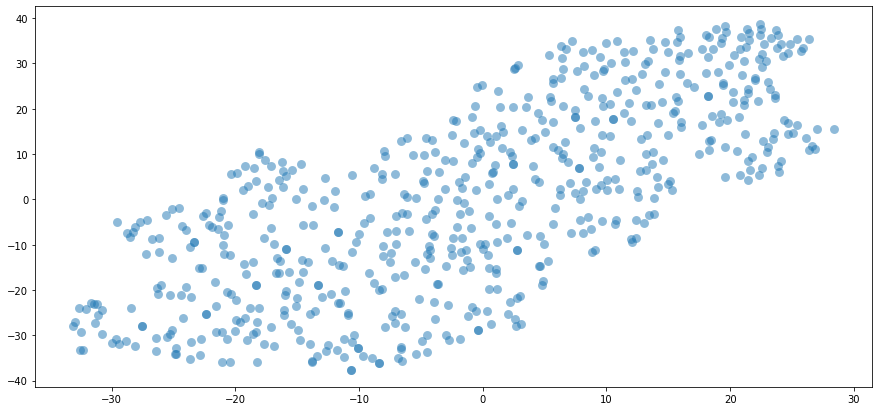

In [ ]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import pairwise_distances

distance = pairwise_distances(X, metric='cosine')

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 15
fig_size[1] = 7


projection = TSNE().fit_transform(distance)
plot_kwds = {'alpha' : 0.5, 's' : 80, 'linewidths':0}
plt.scatter(*projection.T, **plot_kwds)

No handles with labels found to put in legend.


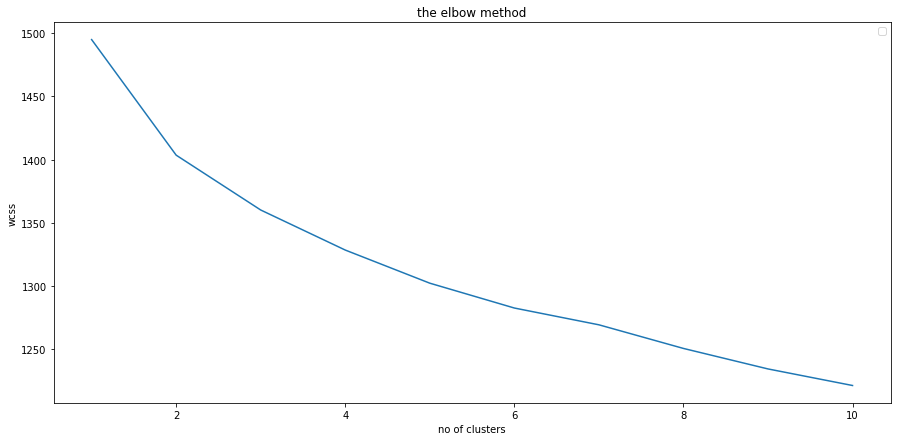

In [ ]:
# Using elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0 )
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('the elbow method')
plt.xlabel('no of clusters')
plt.ylabel('wcss')
plt.legend()
plt.show()

In [ ]:
# Apply kmeans to the dataset
# this gives the nameof cluster to which each person belongs
kmeans = KMeans(n_clusters = 4, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(X)
print(y_kmeans)

[1 1 2 2 3 2 0 0 1 1 2 2 1 1 3 0 0 1 0 0 0 0 0 0 0 0 0 0 2 1 2 1 1 0 2 1 3
 2 2 0 1 2 2 0 1 1 2 0 1 1 2 2 2 2 2 1 0 2 2 2 2 2 0 1 3 1 3 3 2 2 2 1 2 1
 0 1 0 0 2 1 3 1 2 2 2 1 3 3 0 1 1 2 2 2 1 0 0 1 1 1 2 2 3 1 2 0 2 2 1 1 0
 1 0 3 2 2 3 3 1 1 1 2 2 1 1 3 1 3 3 1 2 2 2 1 2 2 1 0 2 1 1 2 0 3 3 2 1 2
 1 3 0 3 1 0 2 2 2 2 1 0 0 1 0 2 0 2 0 2 3 1 1 0 2 3 3 2 1 1 2 3 1 3 3 0 0
 1 1 2 1 3 0 0 1 3 3 2 2 3 0 1 2 2 1 1 0 2 1 2 1 3 1 2 0 0 2 0 1 2 2 2 3 1
 2 3 1 0 2 0 2 1 2 2 2 0 3 3 1 3 2 1 3 2 1 3 3 3 1 3 0 3 3 1 0 3 2 0 3 0 2
 0 2 2 1 1 1 3 2 0 2 1 3 0 2 2 1 1 2 2 1 0 1 3 1 0 2 0 2 2 2 3 3 2 1 3 1 2
 3 2 0 1 3 3 2 2 0 3 1 3 2 1 2 3 3 1 3 2 1 2 3 3 2 1 2 3 3 3 2 1 1 1 2 1 2
 3 0 1 3 1 0 1 1 2 2 2 2 3 2 2 1 1 0 1 2 2 0 1 3 1 2 2 2 2 2 2 0 2 2 3 0 3
 1 1 2 0 2 2 2 1 3 1 1 1 3 3 3 2 1 1 1 3 3 1 3 2 3 1 2 3 1 0 1 2 1 3 1 1 1
 2 1 0 3 3 0 2 1 3 2 2 1 3 1 0 1 0 2 2 3 3 2 1 0 3 2 1 0 2 1 0 2 3 2 1 1 3
 3 1 2 1 2 0 3 0 1 0 1 2 2 3 2 3 3 3 3 1 2 3 2 2 0 3 2 2 3 0 3 1 2 1 1 2 3
 0 0 0 2 1 1 0 1 3 1 1 1 

In [ ]:
len(y_kmeans)

628

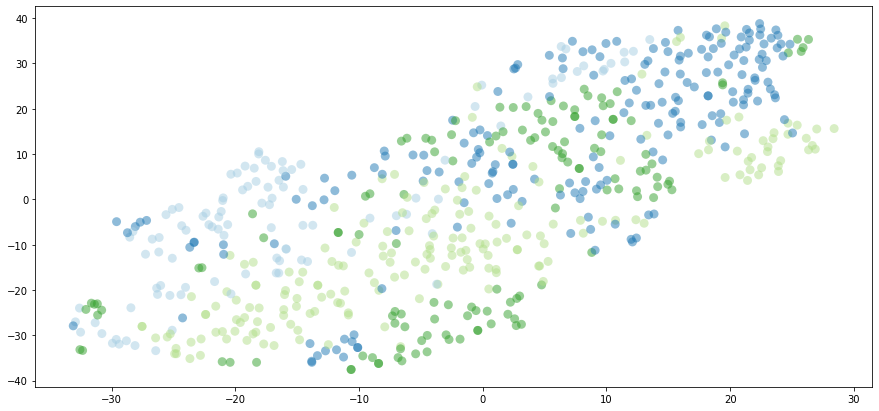

In [ ]:
color_palette = sns.color_palette('Paired', 20)
cluster_colors = [color_palette[X] if X >= 0
                  else (0.5, 0.5, 0.5)
                  for X in y_kmeans]
cluster_member_colors = (cluster_colors)
plt.scatter(*projection.T, s=80, linewidth=0, c=cluster_member_colors, alpha=0.5)

In [ ]:
no_of_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10] 
  
for n_clusters in no_of_clusters: 
  
    cluster = KMeans(n_clusters = n_clusters) 
    cluster_labels = cluster.fit_predict(X) 
  
    # The silhouette_score gives the  
    # average value for all the samples. 
    silhouette_avg = silhouette_score(X, cluster_labels) 
  
    print("For no of clusters =", n_clusters, 
          " The average silhouette_score is :", silhouette_avg) 

For no of clusters = 2  The average silhouette_score is : 0.05724144
For no of clusters = 3  The average silhouette_score is : 0.04942193
For no of clusters = 4  The average silhouette_score is : 0.04569569
For no of clusters = 5  The average silhouette_score is : 0.04377135
For no of clusters = 6  The average silhouette_score is : 0.0417355
For no of clusters = 7  The average silhouette_score is : 0.033551957
For no of clusters = 8  The average silhouette_score is : 0.03068543
For no of clusters = 9  The average silhouette_score is : 0.03556426
For no of clusters = 10  The average silhouette_score is : 0.035219617


In [ ]:
#first cluster
list1 = []
for i in range(len(y_kmeans)):
    if y_kmeans[i] == 0:
        list1.append(new_corpus_customsp[i])
    # no of projects in cluster 1
len(list1)

105

In [ ]:
#projects in cluster 1
list1

['leading telecom firm predictive models risk churn main indicators churn filtered revenue generate telecom firm tagging churned service usage models risk churned also strong indicators churn',
 'analyzing millions financial fraudulent hand audit analytics platform leveraged collect erps rules features extraction engine rules customizable client predictive models features',
 'clients many erps sap oracle financial maintain financial though erps captured analysis remains client audit analytics platform transform interface conducting exploratory analysis visualization analytics tools anomaly duplication top designing scripts get erps etl scripts transform understanding business problems crating interactive exploration visualization templates feature engineering training anomaly algorithms',
 'email address tracked many teams often cause delay email assigned wrong manually assigning sophisticated text mining pipeline python rapidminer easticnet adaboost algorithms tfidf partial pca featur

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cvec = CountVectorizer(stop_words='english', min_df=3, max_df=0.7, ngram_range=(1,2))
sf = cvec.fit_transform(list1)

# PRINTING THE TOP WORDS BY TFIDF WEIGHT FOR PROJECTS WITH MINIMUM 15 WORDS
from sklearn.feature_extraction.text import TfidfTransformer
transformer = TfidfTransformer()
transformed_weights = transformer.fit_transform(sf)
weights = np.asarray(transformed_weights.mean(axis=0)).ravel().tolist()
weights_df = pd.DataFrame({'term': cvec.get_feature_names(), 'weight': weights})

weights_df.sort_values(by='weight', ascending=False).head(40)

term    weight
9                analysis  0.052151
4              algorithms  0.048191
167            regression  0.044695
73               features  0.041938
108               machine  0.041425
159                python  0.040177
98               learning  0.039408
151            predicting  0.036732
33         classification  0.036185
116                models  0.035952
180                   set  0.035553
173                 sales  0.034692
109      machine learning  0.034090
163                random  0.033708
106   logistic regression  0.031805
105              logistic  0.031805
99                   like  0.031561
0                accuracy  0.031343
164         random forest  0.030527
78                 forest  0.030527
70                feature  0.028201
215         visualization  0.026970
171                  risk  0.026291
76              financial  0.025588
152            prediction  0.025480
205                  tree  0.024466
190                   svm  0.024201
38               cleaning  0.023837
51               decision  0.023600
155                 price  0.023113
101                linear  0.022935
34             classifier  0.022752
66            exploratory  0.021946
67   exploratory analysis  0.021946
23                  bayes  0.021211
45                company  0.020562
69                factors  0.020268
187                 stock  0.020234
52          decision tree  0.020073
203               trained  0.019935

In [ ]:
list10 = ' '.join(list1)


# Python code to find frequency of each word 
def freq(str): 
  
    # break the string into list of words  
    str = str.split()          
    str2 = [] 
  
    # loop till string values present in list str 
    for i in str:              
  
        # checking for the duplicacy 
        if i not in str2: 
  
            # insert value in str2 
            str2.append(i)  
              
    for i in range(0, len(str2)): 
  
        # count the frequency of each word(present  
        # in str2) in str and print 
        print('Frequency of', str2[i], 'is :', str.count(str2[i]))     
  
def main(): 
    freq(list10)                     
  
if __name__=="__main__": 
    main()             # call main function 

Frequency of leading is : 1
Frequency of telecom is : 2
Frequency of firm is : 4
Frequency of predictive is : 5
Frequency of models is : 19
Frequency of risk is : 11
Frequency of churn is : 6
Frequency of main is : 1
Frequency of indicators is : 2
Frequency of filtered is : 1
Frequency of revenue is : 2
Frequency of generate is : 4
Frequency of tagging is : 2
Frequency of churned is : 2
Frequency of service is : 1
Frequency of usage is : 3
Frequency of also is : 4
Frequency of strong is : 1
Frequency of analyzing is : 1
Frequency of millions is : 1
Frequency of financial is : 11
Frequency of fraudulent is : 3
Frequency of hand is : 1
Frequency of audit is : 2
Frequency of analytics is : 6
Frequency of platform is : 3
Frequency of leveraged is : 1
Frequency of collect is : 3
Frequency of erps is : 4
Frequency of rules is : 2
Frequency of features is : 25
Frequency of extraction is : 3
Frequency of engine is : 1
Frequency of customizable is : 1
Frequency of client is : 4
Frequency of cli

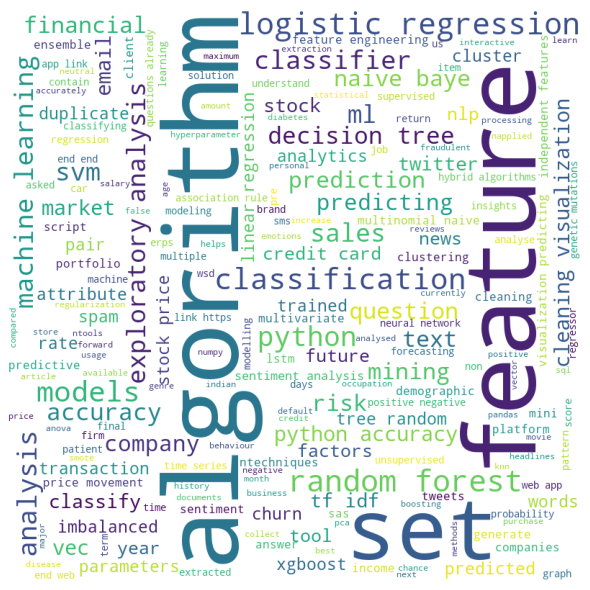

In [ ]:
from wordcloud import WordCloud, STOPWORDS 
stopwords = set(STOPWORDS) 
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(list10) 
# plot the WordCloud image for cluster 1 min_words = 15                       
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

In [ ]:
# second cluster
list2 = []
for i in range(len(y_kmeans)):
    if y_kmeans[i] == 1:
        list2.append(new_corpus_customsp[i])
    #no of projects in cluster 2 
len(list2)

199

In [ ]:
list2

['de duplication faces major challenges de dup algorithm complexity means time get answer rise exponentially increase solved sorted neighborhood second achieve tradeoff precision recall improves score solved machine learning collecting training',
 'analyze steel cast limited forging companys comparison peers fundamental analysis financial statements calculated relevant financial ratios evaluate companys status calculated liquidity financing ratios compared best performer sector bharat forge limited',
 'algorithm dynamic maze moving obstacles path source destination',
 'author python library einsteinpy library computations nrelativity geodesic equations solving odes visualisations summer gsoc openastronomy numbrella along standalone organisation esa socis set ci cd test automation documentation forthe codebase research university toronto cern nstudying negative matter effect gravitational lensing sponsored python software foundation numfocus esa',
 'clustering categorise countries socio

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cvec = CountVectorizer(stop_words='english', min_df=3, max_df=0.7, ngram_range=(1,2))
sf = cvec.fit_transform(list2)

# PRINTING THE TOP WORDS BY TFIDF WEIGHT
from sklearn.feature_extraction.text import TfidfTransformer
transformer = TfidfTransformer()
transformed_weights = transformer.fit_transform(sf)
weights = np.asarray(transformed_weights.mean(axis=0)).ravel().tolist()
weights_df = pd.DataFrame({'term': cvec.get_feature_names(), 'weight': weights})

weights_df.sort_values(by='weight', ascending=False).head(30)

term    weight
10     algorithm  0.031295
376         time  0.028815
166        image  0.027930
307       python  0.024459
13      analysis  0.021874
149         game  0.021560
194     learning  0.020326
301   processing  0.017034
338          set  0.015705
197         like  0.015464
91      designed  0.014942
270   parameters  0.014808
154          gui  0.014320
372         test  0.013560
390   university  0.013309
11    algorithms  0.013212
325        robot  0.013122
247      network  0.012942
48           car  0.012791
221      methods  0.012760
184         java  0.012485
399       visual  0.011936
344   similarity  0.011812
133     features  0.011679
224     modeling  0.011327
346    simulated  0.011164
196      library  0.011056
1       accuracy  0.010765
386       travel  0.010750
384  transaction  0.010733

In [ ]:
list20 = ' '.join(list2)


# Python code to find frequency of each word 
def freq(str): 
  
    # break the string into list of words  
    str = str.split()          
    str2 = [] 
  
    # loop till string values present in list str 
    for i in str:              
  
        # checking for the duplicacy 
        if i not in str2: 
  
            # insert value in str2 
            str2.append(i)  
              
    for i in range(0, len(str2)): 
  
        # count the frequency of each word(present  
        # in str2) in str and print 
        print('Frequency of', str2[i], 'is :', str.count(str2[i]))     
  
def main(): 
    freq(list20)                     
  
if __name__=="__main__": 
    main()             # call main function 

Frequency of de is : 3
Frequency of duplication is : 1
Frequency of faces is : 3
Frequency of major is : 6
Frequency of challenges is : 2
Frequency of dup is : 1
Frequency of algorithm is : 35
Frequency of complexity is : 4
Frequency of means is : 2
Frequency of time is : 35
Frequency of get is : 10
Frequency of answer is : 3
Frequency of rise is : 1
Frequency of exponentially is : 1
Frequency of increase is : 2
Frequency of solved is : 2
Frequency of sorted is : 1
Frequency of neighborhood is : 1
Frequency of second is : 4
Frequency of achieve is : 5
Frequency of tradeoff is : 1
Frequency of precision is : 1
Frequency of recall is : 1
Frequency of improves is : 2
Frequency of score is : 5
Frequency of machine is : 6
Frequency of learning is : 15
Frequency of collecting is : 2
Frequency of training is : 5
Frequency of analyze is : 2
Frequency of steel is : 1
Frequency of cast is : 1
Frequency of limited is : 3
Frequency of forging is : 1
Frequency of companys is : 2
Frequency of compar

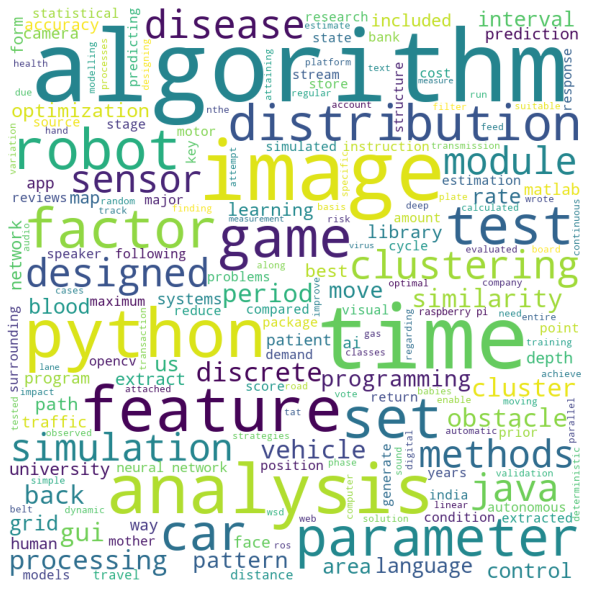

In [ ]:
from wordcloud import WordCloud, STOPWORDS 
stopwords = set(STOPWORDS) 
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(list20) 
# plot the WordCloud image for cluster 1 min_words = 20                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

In [ ]:
# second cluster
list3 = []
for i in range(len(y_kmeans)):
    if y_kmeans[i] == 2:
        list3.append(new_corpus_customsp[i])
    #no of projects in cluster 2 
len(list3)

191

In [ ]:
list3

['psnr currently drafting paperforthe algorithm reconstruction k space superresolution images nmri lot faster highly sub sampled knee mri forthe packed imaginary nand parts fourier space',
 'accuracy solved time classification basis position camera flowneta optical flows frames optical flows ndetermine motion camera subject resnet classification',
 'american sign language primary language north america deaf individuals also hard hearing individuals language employs signs hand along facial gestures bodily pastures images contained hand gestures encoded alphabetic letters trained convolutional neural network classify images asl letters loading examining preprocessing trained network tested',
 'beat baseline score credibility prediction events credbank initial exploratory analysis multi hierarchical attention network operating tweet plan hierarchical transformer encoder decoder architecture improve',
 'end end pipeline abnormalities chest x ray top chexpert chest x ray competition nhttps 

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cvec = CountVectorizer(stop_words='english', min_df=3, max_df=0.7, ngram_range=(1,2))
sf = cvec.fit_transform(list3)

# PRINTING THE TOP WORDS BY TFIDF WEIGHT
from sklearn.feature_extraction.text import TfidfTransformer
transformer = TfidfTransformer()
transformed_weights = transformer.fit_transform(sf)
weights = np.asarray(transformed_weights.mean(axis=0)).ravel().tolist()
weights_df = pd.DataFrame({'term': cvec.get_feature_names(), 'weight': weights})

weights_df.sort_values(by='weight', ascending=False).head(30)

term    weight
158           image  0.050242
216         network  0.049947
183        learning  0.047773
222          neural  0.046454
161          images  0.046040
352         trained  0.042896
89             deep  0.036161
223  neural network  0.034297
4          accuracy  0.032348
90    deep learning  0.030861
55   classification  0.028797
64              cnn  0.028639
178        language  0.028263
205          models  0.027240
11        algorithm  0.025714
221        networks  0.025541
344            text  0.024171
275     recognition  0.023135
193            lstm  0.022242
19     architecture  0.022032
346            time  0.022029
189            like  0.021606
195         machine  0.021215
264      processing  0.020890
337      tensorflow  0.020332
12       algorithms  0.019963
60         classify  0.019209
265          python  0.019161
356        training  0.018298
79    convolutional  0.018000

In [ ]:
list30 = ' '.join(list3)


# Python code to find frequency of each word 
def freq(str): 
  
    # break the string into list of words  
    str = str.split()          
    str2 = [] 
  
    # loop till string values present in list str 
    for i in str:              
  
        # checking for the duplicacy 
        if i not in str2: 
  
            # insert value in str2 
            str2.append(i)  
              
    for i in range(0, len(str2)): 
  
        # count the frequency of each word(present  
        # in str2) in str and print 
        print('Frequency of', str2[i], 'is :', str.count(str2[i]))     
  
def main(): 
    freq(list30)                     
  
if __name__=="__main__": 
    main()             # call main function 

Frequency of psnr is : 1
Frequency of currently is : 5
Frequency of drafting is : 2
Frequency of paperforthe is : 1
Frequency of algorithm is : 24
Frequency of reconstruction is : 4
Frequency of k is : 17
Frequency of space is : 8
Frequency of superresolution is : 1
Frequency of images is : 57
Frequency of nmri is : 1
Frequency of lot is : 3
Frequency of faster is : 7
Frequency of highly is : 2
Frequency of sub is : 4
Frequency of sampled is : 1
Frequency of knee is : 1
Frequency of mri is : 1
Frequency of forthe is : 1
Frequency of packed is : 1
Frequency of imaginary is : 1
Frequency of nand is : 2
Frequency of parts is : 4
Frequency of fourier is : 1
Frequency of accuracy is : 41
Frequency of solved is : 1
Frequency of time is : 24
Frequency of classification is : 35
Frequency of basis is : 2
Frequency of position is : 3
Frequency of camera is : 6
Frequency of flowneta is : 1
Frequency of optical is : 4
Frequency of flows is : 2
Frequency of frames is : 4
Frequency of ndetermine is 

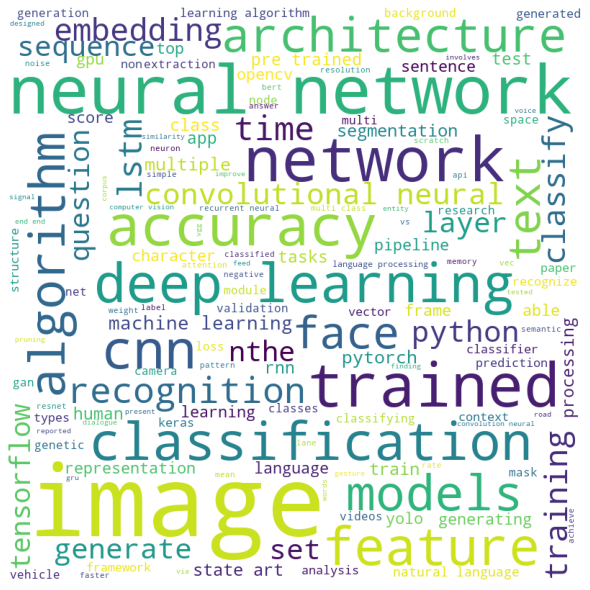

In [ ]:
list30 = ' '.join(list3)

from wordcloud import WordCloud, STOPWORDS 
stopwords = set(STOPWORDS) 
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(list30) 
# plot the WordCloud image for corpus with custom stopwords applied                      
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

In [ ]:
# second cluster
list4 = []
for i in range(len(y_kmeans)):
    if y_kmeans[i] == 3:
        list4.append(new_corpus_customsp[i])
    #no of projects in cluster 2 
len(list4)

133

In [ ]:
list4

['side simple interface machine learning personalize scalable responsive suggests simple job seeker need upload resume list relevant jobs inputs achieve scalable web crawler get job descriptions websites job descriptions resume processed text mining extract finally predictive jobs similar resume',
 'client wanted entities documents due documents size taking lot time manually automate names entities recognition entity disambiguation',
 'chunking maximum entropy models koe https www aclweb org anthology w pdf baseline selects chunk tag frequently associated nthe speech tag',
 'conversational bot chatbot rasa framework zomato api call deployed slack main bot good discovery across several indian cities',
 'android app driving collecting smart phone sensors like accelerometer gps gyroscope unsafe harsh driving k means clustering algorithm found thresholds events brake acceleration left turn right turn thresholds separate automata events automata time basis accuracy around android studio jav

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cvec = CountVectorizer(stop_words='english', min_df=3, max_df=0.7, ngram_range=(1,2))
sf = cvec.fit_transform(list4)

# PRINTING THE TOP WORDS BY TFIDF WEIGHT
from sklearn.feature_extraction.text import TfidfTransformer
transformer = TfidfTransformer()
transformed_weights = transformer.fit_transform(sf)
weights = np.asarray(transformed_weights.mean(axis=0)).ravel().tolist()
weights_df = pd.DataFrame({'term': cvec.get_feature_names(), 'weight': weights})

weights_df.sort_values(by='weight', ascending=False).head(30)

term    weight
10          android  0.055228
227         website  0.051429
15              app  0.050779
185          server  0.030735
112            like  0.030372
66         features  0.029941
102            java  0.027378
130          module  0.026055
168          python  0.025879
194        software  0.025403
14              api  0.025000
158        platform  0.024994
60              end  0.024241
73        framework  0.023965
132           mysql  0.023416
43              css  0.022221
229        websites  0.021925
171  recommendation  0.021454
105        language  0.021247
226             web  0.020810
156             php  0.020777
69            files  0.019994
76    functionality  0.018950
212            time  0.018942
108        learning  0.018926
103      javascript  0.018921
7          analysis  0.018816
46         database  0.018778
88             html  0.018427
89         html css  0.018427

In [ ]:
list40 = ' '.join(list4)


# Python code to find frequency of each word 
def freq(str): 
  
    # break the string into list of words  
    str = str.split()          
    str2 = [] 
  
    # loop till string values present in list str 
    for i in str:              
  
        # checking for the duplicacy 
        if i not in str2: 
  
            # insert value in str2 
            str2.append(i)  
              
    for i in range(0, len(str2)): 
  
        # count the frequency of each word(present  
        # in str2) in str and print 
        print('Frequency of', str2[i], 'is :', str.count(str2[i]))     
  
def main(): 
    freq(list40)                     
  
if __name__=="__main__": 
    main()             # call main function 

Frequency of side is : 7
Frequency of simple is : 6
Frequency of interface is : 8
Frequency of machine is : 9
Frequency of learning is : 11
Frequency of personalize is : 1
Frequency of scalable is : 2
Frequency of responsive is : 3
Frequency of suggests is : 1
Frequency of job is : 5
Frequency of seeker is : 1
Frequency of need is : 4
Frequency of upload is : 3
Frequency of resume is : 7
Frequency of list is : 3
Frequency of relevant is : 5
Frequency of jobs is : 3
Frequency of inputs is : 1
Frequency of achieve is : 2
Frequency of web is : 11
Frequency of crawler is : 2
Frequency of get is : 8
Frequency of descriptions is : 3
Frequency of websites is : 7
Frequency of processed is : 1
Frequency of text is : 7
Frequency of mining is : 1
Frequency of extract is : 1
Frequency of finally is : 3
Frequency of predictive is : 1
Frequency of similar is : 3
Frequency of client is : 3
Frequency of wanted is : 1
Frequency of entities is : 2
Frequency of documents is : 5
Frequency of due is : 3
Fr

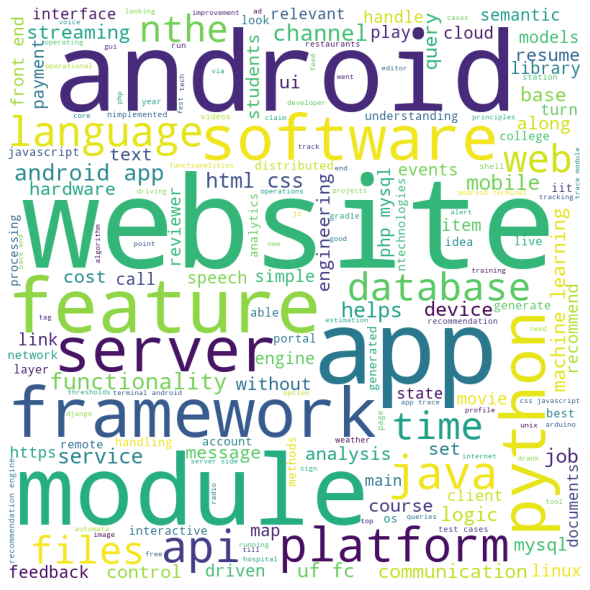

In [ ]:
list40 = ' '.join(list4)

from wordcloud import WordCloud, STOPWORDS 
stopwords = set(STOPWORDS) 
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(list40) 
# plot the WordCloud image for corpus with custom stopwords applied                      
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 